## André Manesco Araújo
## Nas análises feitas com dos dados do MovieLens foi possível descobrir quais são os gêneros de filmes mais votados pelos telespectadores bem como os que eles mais tem preferência. Também é possível verificar quais os gêneros que tem seu público mais fiel, tendo notas mais consisas e com menor variação.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.3
Usando seaborn 0.10.1
Usando scipy 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução
filmes = pd.read_csv('movies.csv')
filmes.rename(columns = {'movieId':'filmeId', 'title':'titulo', 'genres':'generos'}, inplace = True)
filmes.set_index('filmeId', inplace = True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução
notas = pd.read_csv('ratings.csv')
notas.rename(columns= {'usetId':'usuarioId', 'movieId':'filmeId', 'rating':'nota', 'timestamp':'momento'}, inplace = True)

In [8]:
notas.head()

,userId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [0]:
# solução
filmes['nota_media'] = notas.groupby('filmeId').nota.mean()

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme

total_de_votos_por_filme = notas.groupby('filmeId').nota.count()
total_de_votos_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [0]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = total_de_votos_por_filme
filmes = filmes.query('total_de_votos > 49')

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

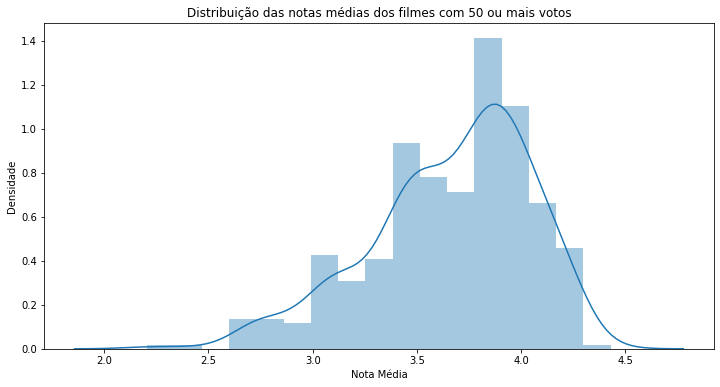

In [14]:
# solução histograma
ax = sns.distplot(filmes.nota_media)
ax.set_title('Distribuição das notas médias dos filmes com 50 ou mais votos')
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.figure.set_size_inches(12, 6)
ax

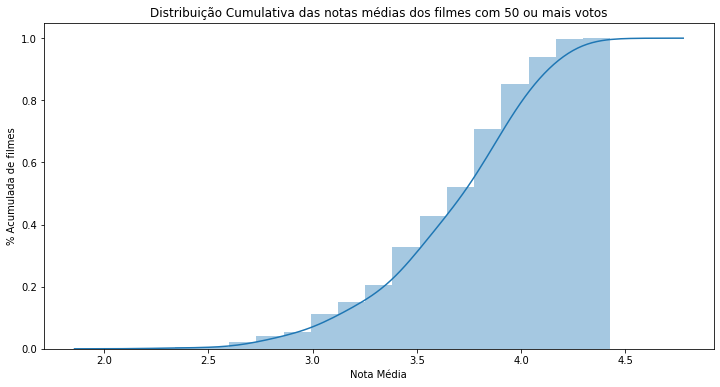

In [15]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, hist_kws = {'cumulative' : True}, kde_kws = {'cumulative' : True})
ax.set_title('Distribuição Cumulativa das notas médias dos filmes com 50 ou mais votos')
ax.set(xlabel = 'Nota Média', ylabel = '% Acumulada de filmes')
ax.figure.set_size_inches(12, 6)
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

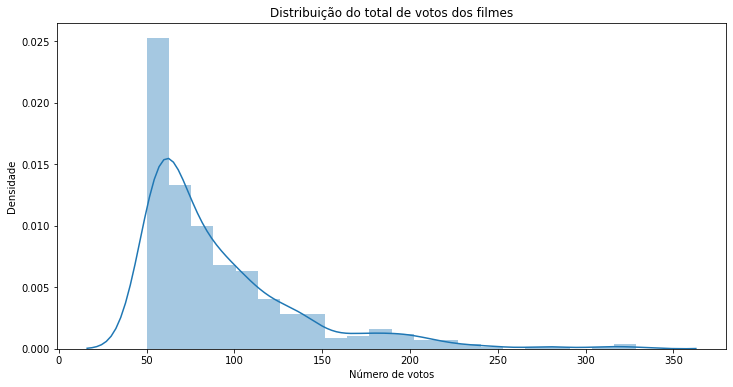

In [16]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos)
ax.set_title('Distribuição do total de votos dos filmes')
ax.set(xlabel = 'Número de votos', ylabel = 'Densidade')
ax.figure.set_size_inches(12, 6)
ax

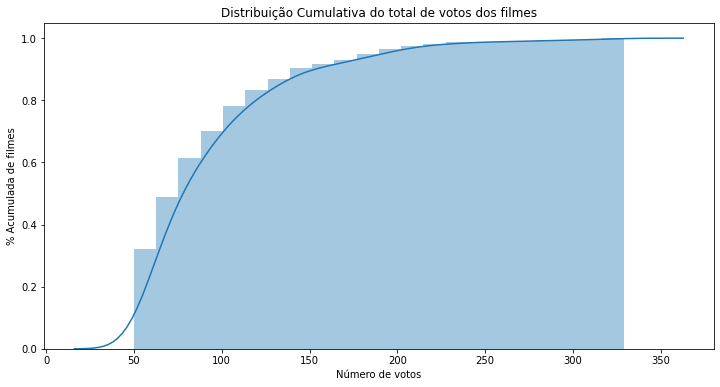

In [17]:
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos, hist_kws = {'cumulative' : True}, kde_kws = {'cumulative' : True})
ax.set_title('Distribuição Cumulativa do total de votos dos filmes')
ax.set(xlabel = 'Número de votos', ylabel = '% Acumulada de filmes')
ax.figure.set_size_inches(12, 6)
ax

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

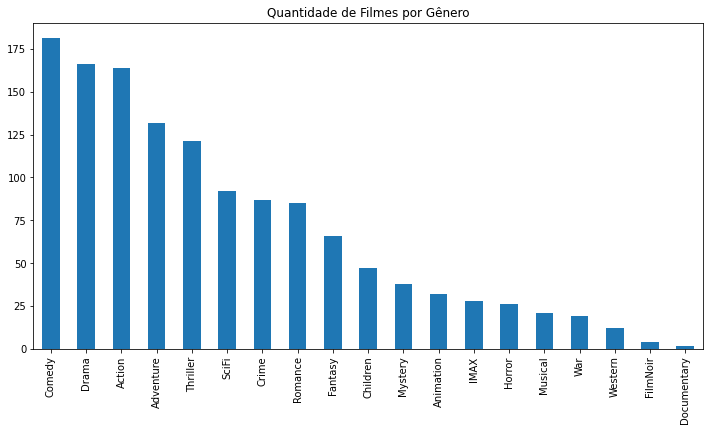

In [22]:
# solução
numero_de_filmes_por_genero = generos.sum()
numero_de_filmes_por_genero.sort_values(ascending=False).plot.bar(title = 'Quantidade de Filmes por Gênero', figsize=(12,6))

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes = numero_de_filmes_por_genero.sort_values(ascending = False).head()

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão

votos_por_genero_por_filme1 = votos_por_genero_por_filme.sum().sort_values(ascending=False)
votos_por_genero_por_filme1

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

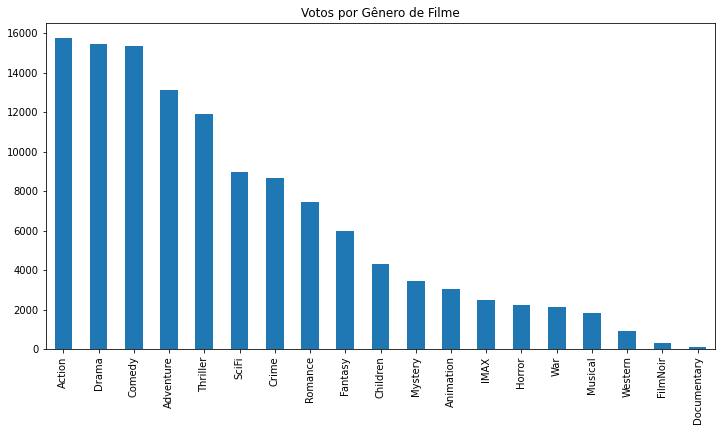

In [27]:
# solução

votos_por_genero_por_filme1.sort_values(ascending=False).plot.bar(title = 'Votos por Gênero de Filme', figsize=(12,6))

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código

popularidade_media_por_genero = (votos_por_genero_por_filme1 / numero_de_filmes_por_genero).sort_values(ascending=False)
popularidade_media_por_genero

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

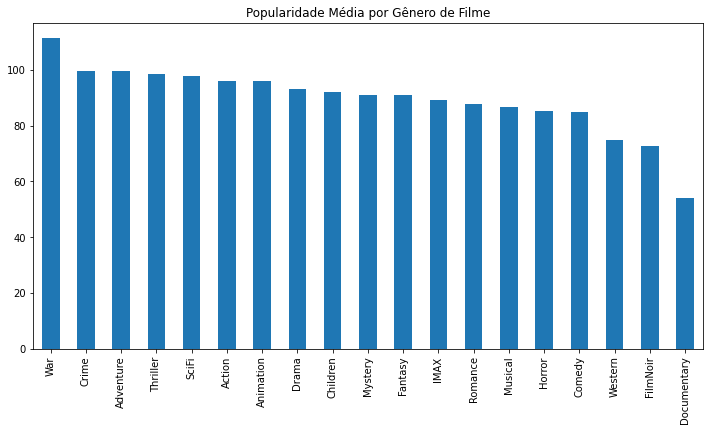

In [29]:
# solução com visualização 
popularidade_media_por_genero.plot.bar(title = 'Popularidade Média por Gênero de Filme', figsize=(12,6))

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre): O gênero War, apesar de ter uma baixa quantidade de filmes é o gênero mais popular. Podemos pensar que o público desse gênero é mais fiel. Já o gênero Action, possui a terceira maior quantidade de filmes e a maior quantidade de votos por filme, porém não é um gênero no qual as pessoas votam muito, tendo a sua popularidade diminuida, se tornando o 6º gênero mais popular.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

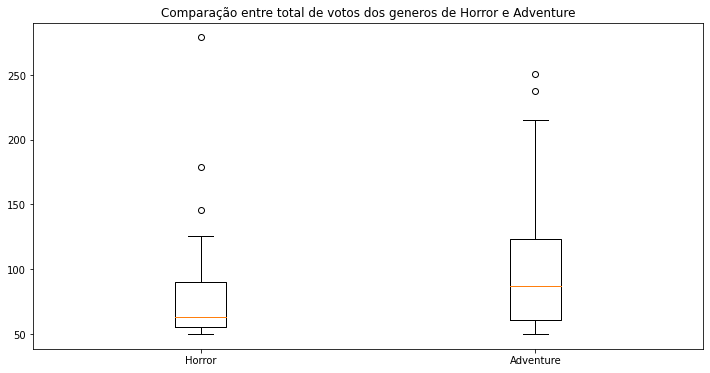

In [30]:
# solução:

import matplotlib.pyplot as plt

notas_horror = votos_por_genero_por_filme.query('Horror !=0').Horror
notas_adventure = votos_por_genero_por_filme.query('Adventure !=0').Adventure

fig, ax = plt.subplots()
ax.set_title('Comparação entre total de votos dos generos de Horror e Adventure')
ax.figure.set_size_inches(12,6) 
ax.boxplot([notas_horror, notas_adventure], labels = ['Horror', 'Adventure'])

plt.show()

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

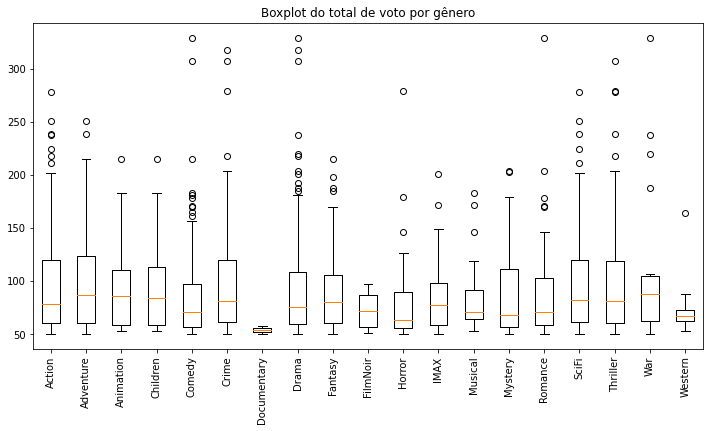

In [31]:
lista_votos_por_genero = []

for genero in generos.columns:
    # Aqui como o query recebe uma string podemos manipular o seu valor
    votos = filmes.query(f'{genero} == 1')['total_de_votos']
    lista_votos_por_genero.append(votos)

fig, ax = plt.subplots()
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot do total de voto por gênero')
ax = plt.boxplot(lista_votos_por_genero, labels=generos.columns)
plt.xticks(rotation=90)
plt.show()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: Adventure, pois apesar de ter uma maior variação, ele possui uma maior mediana em comparação ao genero Horror, e também possui maior popularidade.
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

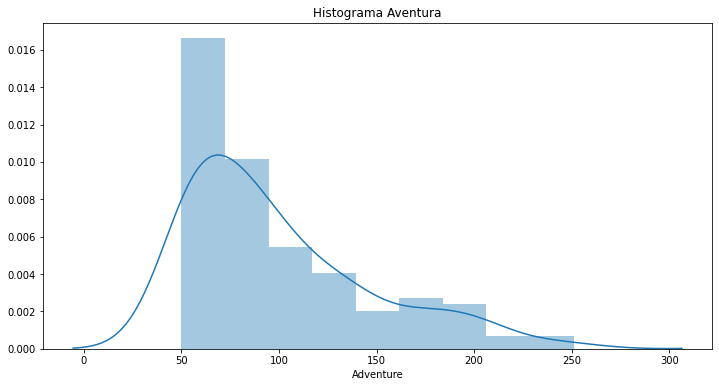

In [32]:
# solucao histograma de aventura
ax = sns.distplot(notas_adventure)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma Aventura')
ax

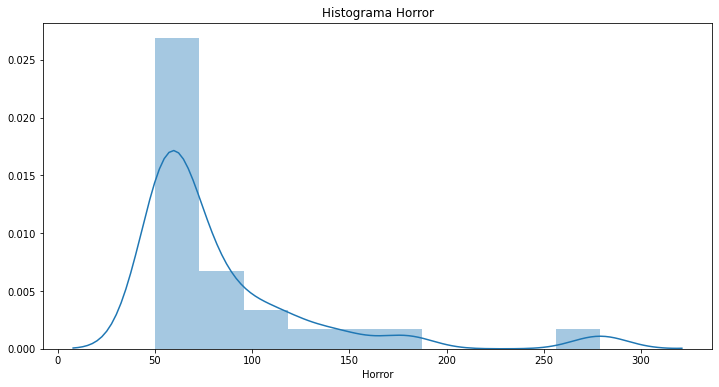

In [33]:
# solucao histograma de horror
ax = sns.distplot(notas_horror)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma Horror')
ax

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

from scipy.stats import normaltest

_, p = normaltest(notas_horror)
p

1.2786148884334685e-07

In [35]:
# solução com o teste desejado

from scipy.stats import ranksums

_, p = ranksums(notas_horror, notas_adventure)
p

0.04782366231999856

### Solução (explique sua conclusão):



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [0]:
# solução:
nota_media_adventure = filmes.query('Adventure == 1')['nota_media']
nota_media_horror = filmes.query('Horror == 1')['nota_media']

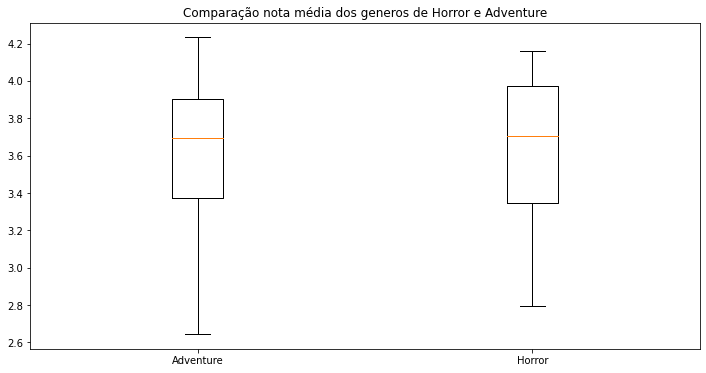

In [37]:
fig, ax = plt.subplots()
ax.set_title('Comparação nota média dos generos de Horror e Adventure')
ax.figure.set_size_inches(12,6) 
ax.boxplot([nota_media_adventure, nota_media_horror], labels = ['Adventure', 'Horror'])
ax

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: Horror. Apesar das médias serem parecidas, as notas do gênero em questão começam a partir de 2.8.



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

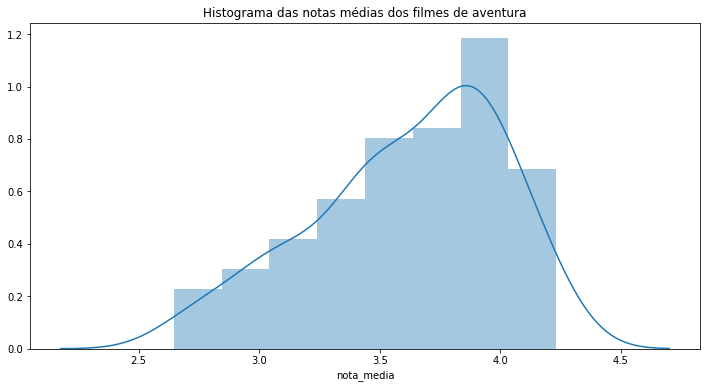

In [38]:
# solucao histograma de aventura
ax = sns.distplot(nota_media_adventure)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma das notas médias dos filmes de aventura')
ax

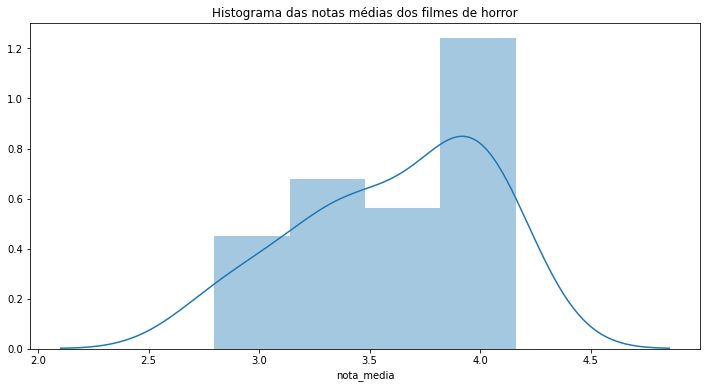

In [39]:
# solucao histograma de horror
ax = sns.distplot(nota_media_horror)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma das notas médias dos filmes de horror')
ax

In [40]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_, p = normaltest(nota_media_adventure)
p

0.012835697582553224

In [41]:
# solução com o teste desejado

_, p = ranksums(nota_media_adventure, nota_media_horror)
p

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: Sim.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: Adventure. Visto que as estatisticas das notas são próximas e a popularidade de adventure é maior, a melhor opção seria adventure



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [42]:
votos_por_genero_por_filme1

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

In [43]:
# solução: calculando os 2 generos mais votados

nota_por_filme = []

for genero in (['Action', 'Drama']):
    # Aqui como o query recebe uma string podemos manipular o seu valor
    votos = filmes.query(f'{genero} == 1')['nota_media']
    nota_por_filme.append(votos)
  
nota_por_filme

[filmeId
 6         3.946078
 10        3.496212
 70        3.509091
 95        3.023810
 110       4.031646
             ...   
 91529     3.993421
 96079     3.810000
 99114     3.943662
 112852    4.050847
 122904    3.833333
 Name: nota_media, Length: 164, dtype: float64, filmeId
 11        3.671429
 16        3.926829
 17        3.776119
 25        3.625000
 34        3.652344
             ...   
 91500     3.435185
 99114     3.943662
 106782    3.916667
 109374    3.778846
 116797    4.020000
 Name: nota_media, Length: 166, dtype: float64]

In [0]:
# solução: encontrando os top 5 filmes desses generos


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [45]:
# solucao
filmes.corr()

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
ano_de_lancamento,1.000000,-0.159146,-0.028709,0.140392,0.114268,-0.052874,-0.149019,0.019272,0.060993,0.047746,0.028411,-0.076776,0.002235,-0.026873,0.248002,-0.296174,0.005591,-0.024589,0.069839,0.104458,0.026118,-0.062539
nota_media,-0.159146,1.000000,0.342584,-0.154089,-0.079985,0.043071,-0.030360,-0.256005,0.190220,-0.003486,0.277662,-0.020986,0.081766,-0.033877,0.064931,-0.008529,0.129914,-0.072002,-0.136717,-0.016782,0.125615,-0.059642
total_de_votos,-0.028709,0.342584,1.000000,0.066239,0.104380,0.023442,0.001764,-0.128527,0.079766,-0.055010,0.018779,-0.009976,-0.039408,-0.036132,-0.016285,-0.024741,-0.007051,-0.045427,0.063802,0.085525,0.087999,-0.060789
Action,0.140392,-0.154089,0.066239,1.000000,0.333591,-0.173589,-0.213311,-0.291578,0.061890,-0.050596,-0.253573,-0.118162,-0.022520,-0.009411,0.129896,-0.145649,-0.063915,-0.200278,0.325969,0.311401,0.070618,0.046621
Adventure,0.114268,-0.079985,0.104380,0.333591,1.000000,0.163576,0.178956,-0.090515,-0.241256,-0.043048,-0.290255,0.243373,-0.061015,-0.096786,0.217954,-0.049984,-0.090344,-0.173745,0.278520,-0.005431,-0.086730,0.044838
Animation,-0.052874,0.043071,0.023442,-0.173589,0.163576,1.000000,0.753654,0.125706,-0.091665,-0.018487,-0.121935,0.227460,-0.026203,-0.068516,0.107701,0.430701,-0.052933,0.021108,-0.097383,-0.167796,-0.058093,-0.045797
Children,-0.149019,-0.030360,0.001764,-0.213311,0.178956,0.753654,1.000000,0.119962,-0.130389,-0.022818,-0.125559,0.371888,-0.032341,-0.084567,0.092512,0.406724,-0.077583,-0.016294,-0.101054,-0.207105,-0.071703,-0.056526
Comedy,0.019272,-0.256005,-0.128527,-0.291578,-0.090515,0.125706,0.119962,1.000000,-0.126158,0.013323,-0.288999,0.095479,-0.077683,-0.028315,-0.155010,0.054861,-0.200222,0.229377,-0.213558,-0.364583,-0.082082,0.004876
Crime,0.060993,0.190220,0.079766,0.061890,-0.241256,-0.091665,-0.130389,-0.126158,1.000000,-0.032710,0.092210,-0.155243,0.193444,-0.048878,-0.032924,-0.108315,0.114410,-0.207496,-0.178411,0.248836,-0.074806,-0.081033
Documentary,0.047746,-0.003486,-0.055010,-0.050596,-0.043048,-0.018487,-0.022818,0.013323,-0.032710,1.000000,0.018156,-0.027700,-0.006328,-0.016545,-0.017211,-0.014783,-0.020292,-0.032243,-0.033871,-0.040520,-0.014029,-0.011059


### Solução
Os dois gêneros com maior correlção com a nota média são:Drama e Comedy

Os dois gêneros com menor correlção com a nota média são:Documentary e Musical

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

### Solução
Os dois gêneros com maior correlção com a nota média são: Children e Mistery

Os dois gêneros com menor correlção com a nota média são: Adventure e Comedy

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

In [46]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


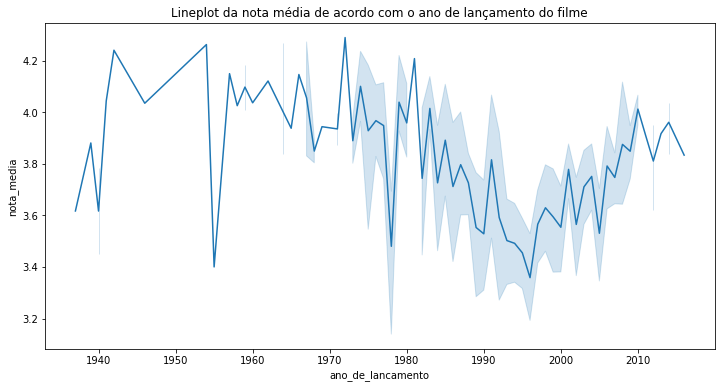

In [47]:
# solucao
ax = sns.lineplot(x = 'ano_de_lancamento', y = 'nota_media', data = filmes)
ax.figure.set_size_inches(12,6)
ax.set_title('Lineplot da nota média de acordo com o ano de lançamento do filme')
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [48]:
# solução (código)
filmes[['ano_de_lancamento', 'nota_media']].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


### Solução (explicação)



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

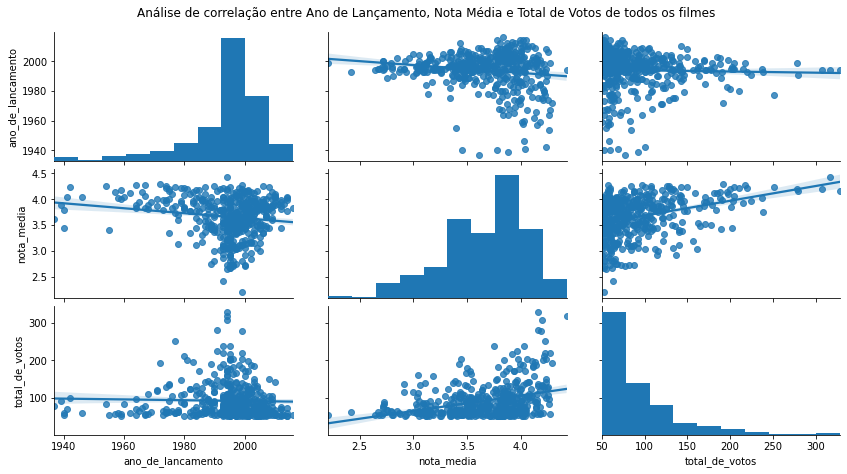

In [49]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]

ax = sns.pairplot(infos, kind='reg')
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Análise de correlação entre Ano de Lançamento, Nota Média e Total de Votos de todos os filmes', y=1.05)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [50]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


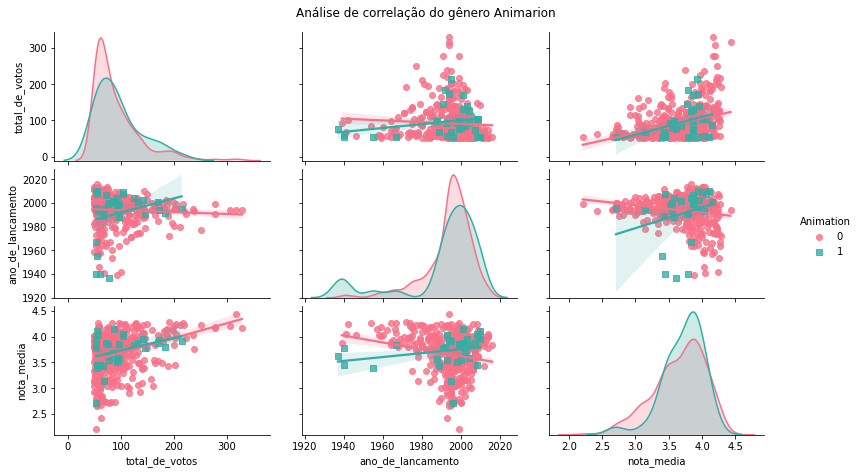

In [51]:
ax = sns.pairplot(data = filmes,
                  x_vars=('total_de_votos', 'ano_de_lancamento', 'nota_media'),
                  y_vars = ('total_de_votos', 'ano_de_lancamento', 'nota_media'),
                  palette='husl', hue='Animation', markers=['o', 's'], kind='reg')
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Análise de correlação do gênero Animarion', y=1.05)
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
A nota dos filmes de Animation parecem cair ao longo dos anos, tendo uma tendência negativa. Já em relação ao total de votos, a mesma categoria de filme tende a aumentar o número de votos. Já as demais categorias elas possuem uma tendência de aumento da nota média com o passar dos anos e um aumento no total de voto. Isso nos mostra que os filmes da categoria Animation estão ficando piores na visão dos telespectadores, enquanto os demais generos estão ficando melhores.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [0]:
# solução